<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="imagepassengersatisfaction.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                   <b>CAPSTONE PROJECT
                   </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## PROBLEM STATEMENT
Predicting customer satisfaction based on their holistic experience while traveling by air.

## PROJECT OUTCOME
For this project, we intend to explore survey results provided by passengers (anonymized), and understand what causes them to be satisfied or dissatisfied. Ultimately, we hope our findings enable us to make
recommendations on how to address the factors that cause dissatisfaction.

## BUSINESS IMPACT
Airline businesses around the world are decimated by Covid-19 as most international air travel 
has been grounded. In fact, some airlines such as Thai Airways have already filed for bankruptcy. 
Nonetheless, once the storm is over, demand for air travel is expected to surge as people rush 
back for overseas holidays. What can airlines prepare to give themselves a competitive edge 
when the crowd finally arrives?
Customer satisfaction is always top of mind for airlines. Unhappy or disengaged customers 
naturally mean fewer passengers and less revenue. It’s important that customers have an 
excellent experience every time they travel. On-time flights, good in-flight entertainment, 
more (and better) snacks, and more legroom might be the obvious contributors to a good 
experience and more loyalty.
While we might hear about those aspects the most, the customer experience is not about just 
the flight itself. It’s everything from purchasing the ticket on the company’s website or mobile 
app to checking bags in at the airport or via a mobile app to waiting in the terminal. This 
mindset has been, and continues to be, adapted to the post-security, onboard, and post-flight 
experience. So how can we determine which of these factors contribute to the satisfaction of 
the customer?
To answer this, we intend on building a classification problem to predict the customer 
satisfactio



## DATA DEFINITION

**Unnamed:0**: Index value

**Id numeric**: Unique identifier

**Gender object**:Gender of the passengers (Female, Male)

**Customer Type**: The customer type (Loyal customer, disloyal customer)

**Age**: The actual age of the passengers

**Type of Travel**:object Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class**:Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance**:The flight distance of this journey

**Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

**Departure/Arrival time convenient**:Departure/Arrival time convenient

**Ease of Online booking**:Satisfaction level of online booking

**Gate location**: Satisfaction level of Gate location

**Food and drink**:Satisfaction level of Food and drink

**Online boarding**:Satisfaction level of online boarding

**Seat comfort**:Satisfaction level of Seat comfort

**Inflight entertainment**:Satisfaction level of inflight 
entertainment

**On-board service**: Satisfaction level of On-board service

**Leg room service**: Satisfaction level of Leg room service

**Baggage handling**:Satisfaction level of baggage handling

**Check-in service**: Satisfaction level of Check-in service

**Inflight service**: Satisfaction level of inflight service

**Cleanliness**: Satisfaction level of Cleanliness

**Departure Delay in Minutes**:Minutes delayed when departure

**Arrival Delay in Minutes**: Minutes delayed when Arrival

**Satisfaction**:Airline satisfaction level(Satisfaction, 
neutral or dissatisfaction)

## Table Of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - [Understand the Data](#data_understanding)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Summary Statistics](#Summary_Statistics)
        - 4.1.4 - [Missing Values](#Missing_Values)
        - 4.1.5 - [Outliers](#Outliers)
        - 4.1.6 - [Insignificant Columns](#Insignificant_Columns)
    - 4.2 - [Exploratory Data Analysis](#Exploratory_Data_Analysis)
        - 4.2.1 - [Univariate Analysis](#Univariate_Analysis)
        - 4.2.2 - [Bivariate Analysis](#Bivariate_Analysis)
    - 4.3 - [Statistical Tests](#Statistical_Tests)
        - 4.3.1 - [Chi-Square Test Of Independence](#Chisquare)
        - 4.3.2 - [Kruskal Wallis Test](#Kruskal_Wallis_Test)
    - 4.4 - [Prepare The Data](#Prepare)
        - 4.4.1 - [Dummy Encoding Of Categorical Varaibles](#Dummy_Encoding)
5. **[Logistic Regression](#Base_Model)**
    - 5.1 - [Train Test Split](#Train_Test_Split)
6. **[Decision Tree](#Decision_Tree)**
7. **[Random_Forest](#Random_Forest)**

<a id='import_lib'></a>
## 1. Import Libraries

**Let us import the required libraries and functions**

In [405]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy import stats
from scipy .stats import chi2
from scipy.stats import chi2_contingency



<a id='set_options'></a>
## 2. Set Options

In [406]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

<a id='Read_Data'></a>
## 3. Read Data

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get insights from the data<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

**Since our dataset is given as two different train and test sets we concatenate them into a single dataset**

In [407]:
# read csv file using pandas
df1=pd.read_csv("train.csv",encoding="latin-1")
df2=pd.read_csv("test.csv",encoding="latin-1")

# concatenating both the datasets.
df=pd.concat([df2,df1])

# display the top 5 rows of the dataframe
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preprocessing is a crucial step that helps enhance the quality of data to promote the 
extraction of meaningful insights from the data. Data preprocessing in Machine Learning refers 
to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a
building and training MachineLearning models.
Data Preparation is the process of collecting, cleaning, and consolidating data into one file or
data table,primarily for use in analysis.<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='data_understanding'></a>
### 4.1 Understand the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

To know the dimensions of the data:

In [408]:
# .shape returns the dimension of the data
df.shape

(129880, 25)

We see the dataframe has 25 columns and 129880 observations.

<a id='Data_Types'></a>
### 4.1.2 Data Types

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>• The satisfaction levels across columns like'Inflight wifi service','Departure/Arrival time 
convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 
'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage 
handling', 'Checkin service', 'Inflight service','Cleanliness' work on a rating system and hence 
can be classified as categorical data.<br>
• The variables: Gender, Type of Travel ,Customer Type and Class are also part of categorical 
data<br>
• The variables :Age, Distance, Departure Delay in Minutes and Arrival Delay in Minutes are 
numerical<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check data types**

In [409]:
# use .dtypes to view the data type of a variable
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

**1. For numerical variables**

In [410]:
# describe the numerical data
# since some of the variables are wrongly classified as numerical,seaparately selecting the numerical variables
# and then finding the summary statistics.
df_num=df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
df_num.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


**2. For categorical features**

In [411]:
# describe the categorical data
df_cat=df.select_dtypes('object')
df_cat.describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


<a id='Missing_Values'></a>
### 4.1.4 Missing Values

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Impute or drop features with missing values based on the percentage of missing values and
relevance for model building.
<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [412]:
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)

# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

# concat the 'Total' and 'Percent' columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
Arrival Delay in Minutes,393,0.302587
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


As the percentage of null values was found to be negligible, we dropped the observations 
containing these null values.


In [413]:
df=df.dropna()

df.isnull().sum()/len(df)

Unnamed: 0                           0.0
id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction    

There are no null values in the data now

 <a id='Outliers'></a>
### 4.1.5 Outliers

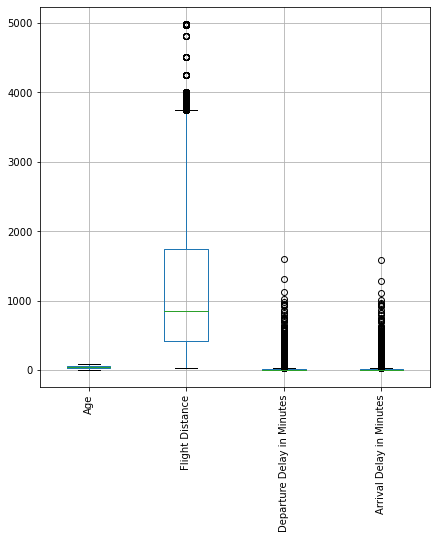

In [414]:
df_num.boxplot()
plt.xticks(rotation=90)
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are outliers present in the Flight Distance, Departure Delay in Minutes and Arrival Delay in 
Minutes column. As these variables play a role in customer satisfaction (more the delay,we can 
assume less satisfied the customer), we are not excluding the outliers . As we proceed with 
model building we can transform the extreme outliers. But for the base model we choose to 
leave the outliers as it is.
<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

 <a id='Insignificant_Columns'></a>
### 4.1.5 Insignificant Columns

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The below are the redundant features that are dropped from the dataset.<br>
o Unnamed: 0- Index value<br>
o Id- Unique identifiers of each row, has no impact on the model<br>
<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [415]:
# dropping the insignificant columns.
df.drop(['Unnamed: 0','id'],inplace=True,axis=1)

<a id='Exploratory_Data_Analysis'></a>
### 4.2 Exploratory Data Analysis

<a id='Univariate_Analysis'></a>
### 4.2.1 Univariate Analysis

**The Numerical variables**

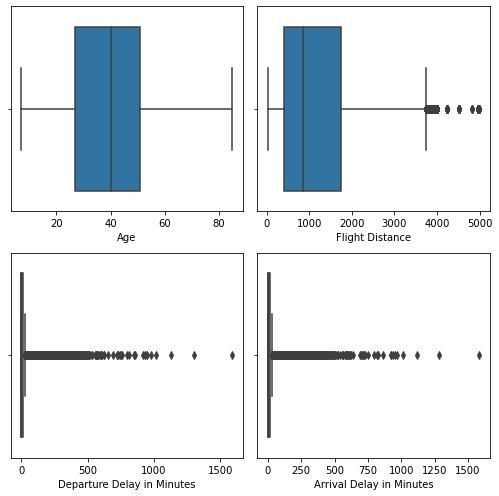

In [416]:
# The numerical Variables.
plt.rcParams['figure.figsize']=[7,7]
for i,j in zip(df_num,range(1,len(df_num))):
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>• Heavy presence of outliers in variables: 'Departure Delay in Minutes', 'Arrival Delay in 
Minutes'<br>
• The average age of passengers was found to be ~40<br>
• The average distance was found to be 1190 miles<br>
<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

**The Rating Columns**

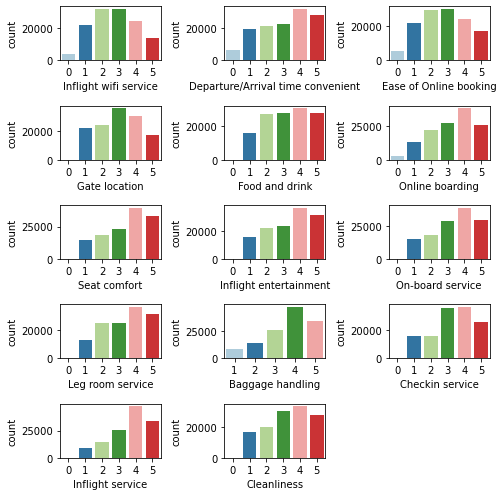

In [417]:
df_rating=df[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
             'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service',
             'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']]

plt.rcParams['figure.figsize']=[7,7]
for i,j in zip(df_rating,range(1,len(df_rating)+1)):
    plt.subplot(5,3,j)
    sns.countplot(df[i],palette='Paired')
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>• A large population of passengers gave an average rating of 4 out of 5 for various factors 
like ease of online booking, on-board service, checkin service etc.<br>
• The factor with the largest amount of dissatisfaction (rating 1) was in-flight service<br>
• There were some factors that were voted zero ,which we can assume to be for the cases
where the customer refused to provide a rating<br>
<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

**The Categorical Columns**

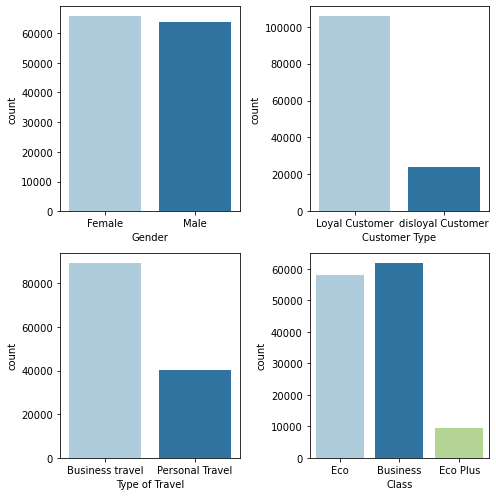

In [76]:
df_categorical=df[['Gender','Customer Type','Type of Travel','Class']]
plt.rcParams['figure.figsize']=[7,7]
for i,j in zip(df_categorical,range(1,len(df_categorical)+1)):
    plt.subplot(2,2,j)
    sns.countplot(df[i],palette='Paired')
plt.tight_layout()
plt.show()    

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>• Majority of passengers chose Business class.<br>
• The data contains information predominantly of loyal customers<br>
• Both genders were more or less equally captured for this project
<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Bivariate_Analysis'></a>
### 4.2.1 Bivariate Analysis

**Numerical Independent vs Target variable**

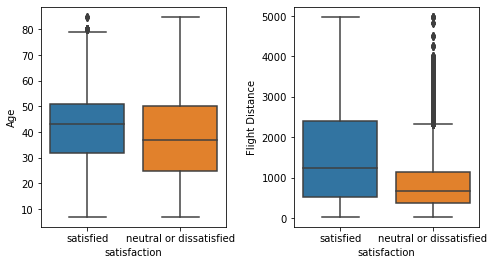

In [77]:
num=df[['Age','Flight Distance']]
plt.rcParams['figure.figsize']=[7,7]
for (i,j) in zip(num,range(1,len(num)+1)):
    plt.subplot(2,2,j)
    sns.boxplot(df['satisfaction'],df[i])
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>• The average age for satisfied and dissatisfied were found to be 37 and 41 respectively<br>
• The average distance travelled by satisfied customers was higher than that of 
neutral/dissatisfied
<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

**Categorical Independent vs target variable**

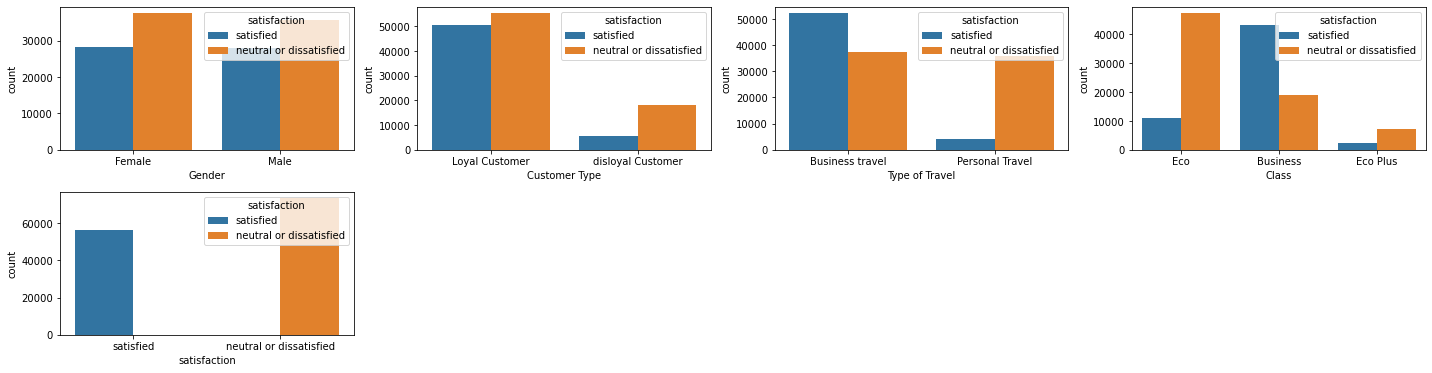

In [78]:
plt.rcParams['figure.figsize']=[20,10]
for (i,j) in zip(df_cat,range(1,len(df_cat)+1)):
    plt.subplot(4,4,j)
    sns.countplot(df[i],hue=df['satisfaction'])
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>• Loyal customers were found to be satisfied on comparison with disloyal ones<br>
• Business travelers’ are highly satisfied<br>
• Moreover, passengers business class get high satisfied count, while passengers in the eco 
and eco plus class were found to be more dissatisfied<br>
• The Main Causes of dissatisfaction are: In-Flight Wifi, Online Booking and Online boarding<br>
• Less But Observable Dissatisfaction is caused by Leg-Room Services and Cleanliness<br>
• Some Dissatisfaction is also caused by Gate Location, Food and Drinks, Seat Comfort, 
Inflight Entertainment, On Board Services<br>
• Online Boarding Shows generally satisfactory ratings, but is one of the main cause of 
dissatisfaction among the dissatisfied customers

<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Statistical_Tests'></a>
### 4.3 Statistical Tests

<a id='Chisquare'></a>
### 4.3.1  Chi-square Test of Independence

 So far we have observed that the satisfaction of the customer has a significant relationship with 
other variables such as the type of travel, their rating of factors like inflight wifi/seat 
comfort/on-board service etc. We have made these observations by studying the graphs above.
We can further validate these observations using statistical tests like Chi-squared 
contingency(Test of independence) and Kruskal Wallis test.

**Chi-Square test of independence**

The Chi-Square test of independence is used to determine if there is a significant relationship 
between two nominal (categorical) variables. 

The hypothesis to test the independence of attributes

H0: The attributes are independent.

H1: The attributes are dependent 

In [79]:
df_cat=df[['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
df_p=pd.DataFrame()
for i in df_cat.columns:
    x=pd.crosstab(df[i],df['satisfaction'])
    obs_val=x.values 
    test_stat, p, dof, expected_value = chi2_contingency(observed = obs_val, correction = False)
    values =  pd.DataFrame({ "p_value": p},index=[i])
    df_p = df_p.append(values)
df_p

,p_value
Gender,3.521830e-05
Customer Type,0.000000e+00
Type of Travel,0.000000e+00
Class,0.000000e+00
Flight Distance,0.000000e+00
Inflight wifi service,0.000000e+00
Departure/Arrival time convenient,2.473802e-127
Ease of Online booking,0.000000e+00
Gate location,0.000000e+00
Food and drink,0.000000e+00


Gender and satisfaction

For the variable Gender the p_value < α ,so we reject the null hypothesis.This means that the Gender and the target variable satisfied are dependent.Gender plays a role in customer satisfaction.

Customer type and satisfaction

For the variable Customer Type the p_value < α ,so we reject the null hypothesis.The variable customer type also makes a difference in the customer satisfaction.

Type of Travel and satisfaction

For the variable Type of travel the p_value < α ,so we reject the null hypothesis.The business travelers travel more frequently than people who travel for personal affairs.So they are more familiar with the flight experiences than the other group.This can create an effect in the customer satisfaction.

Class and satisfaction.

For the varaible Class the p_value <  α , so we reject the null hypothesis.The variable satisfaction is dependent on the variable satisfaction.

Rating variables and satisfaction.

For all the variables the p_value < α , so we reject the null hypothesis. The variable satisfaction is 
dependent on the rating variables.



<a id='Kruskal_Wallis_Test'></a>
### 4.3.2  Kruskal Wallis Test

It is used to check the equality of population medians for more than two independent samples. 
It is a non-parametric test that works similar to ANOVA, but doesn’t require the tests of 
normality and equal variances to be satisfied.

**Kruskal Wallis Test**

The null and alternative hypothesis is given as:

H0:The median of all treatments are the same.

H1: At least one treatment has a different median.


In [131]:
df_h

,p_value
Age,0.000000e+00
Flight Distance,0.000000e+00
Departure Delay in Minutes,3.580163e-137
Arrival Delay in Minutes,7.087659e-287


Numerical variables and satisfaction.
For all the numerical variables the p_value < α , so we reject the null hypothesis. The variable 
satisfaction is dependent on the numerical variables.

<a id='Prepare'></a>
### 4.4 Prepare The Data

<a id='Dummy_Encoding'></a>
### 4.4.1 Dummy Encoding Of Categorical Variables  

In [340]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["satisfaction"]=LE.fit_transform(df["satisfaction"])

In [341]:
df_cat=df[["Gender",'Customer Type','Type of Travel', 'Class']]
df=pd.get_dummies(df,columns=df_cat.columns,drop_first=True)
df.head(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1,0,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,0,0,0,0,0


In [86]:
df.shape

(129487, 24)

##### Scorecard

In [342]:
scorecard=pd.DataFrame(index=["Model_Name","TN","FN","TP","FP","Accuracy","Kfold_accuracy","F1-score","ROC-AUCscore"])
scorecard

""
Model_Name
TN
FN
TP
FP
Accuracy
Kfold_accuracy
F1-score
ROC-AUCscore


<a id='Base_Model'></a>
### 5. Logistic Regression

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We used Logistic Regression for our base model:?<br>
• Logistic Regression is a binary classification algorithm. It predicts the probability of 
occurrence of a label class.<br>
• Consider that logistic regression is used to identify whether the consumer satisfied or not.
<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Train_Test_Split'></a>
### 5.1 Train Test Split

In [343]:
X=df.drop("satisfaction",axis=1)
Y=df["satisfaction"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.7,random_state=100)

#### Base Model

In [344]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
model1=LR.fit(xtrain,ytrain)
ypred=model1.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     21972
           1       0.76      0.82      0.79     16875

    accuracy                           0.81     38847
   macro avg       0.81      0.81      0.81     38847
weighted avg       0.81      0.81      0.81     38847



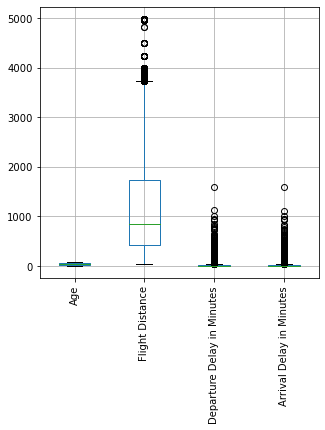

In [278]:
xtrain[df_num.columns].boxplot()
plt.xticks(rotation=90)
plt.show()

In [345]:
from sklearn.metrics import f1_score,accuracy_score
round(accuracy_score(ytest,ypred),2),round(f1_score(ytest,ypred),2)

(0.81, 0.79)

In [346]:
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model1, X,Y,
                         cv=cv, n_jobs=-1)

print(abs(scores))
print("mean score",round(np.mean(abs(scores)),2))

[0.80925168 0.82925322 0.81064175 0.81172291 0.7627616  0.80817052
 0.8125724  0.82252085 0.81495212 0.80468026]
mean score 0.81


In [168]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [210]:
plt.rcParams["figure.figsize"]=[5,5]

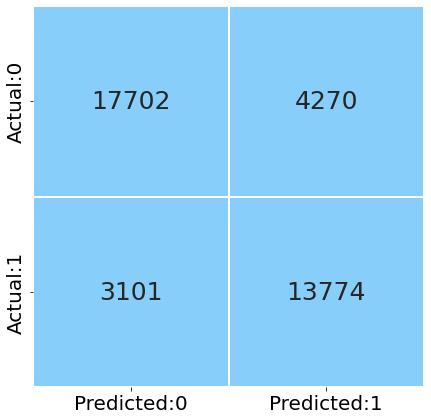

In [347]:
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [348]:
cm[0,0],cm[1,0],cm[1,1],cm[0,1]

(17702, 3101, 13774, 4270)

In [349]:
from sklearn.metrics import roc_curve,roc_curve
from sklearn import metrics

In [350]:
scorecard

""
Model_Name
TN
FN
TP
FP
Accuracy
Kfold_accuracy
F1-score
ROC-AUCscore


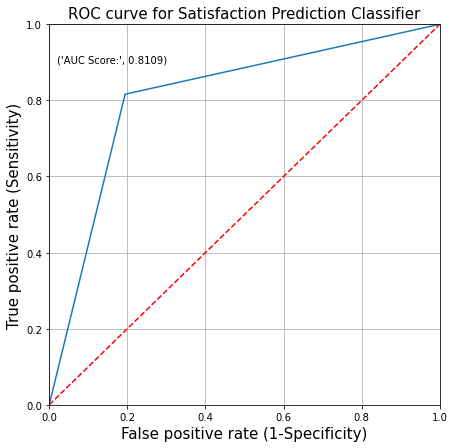

In [318]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Satisfaction Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, ypred),4)))
plt.grid(True)

In [351]:
scorecard

""
Model_Name
TN
FN
TP
FP
Accuracy
Kfold_accuracy
F1-score
ROC-AUCscore


In [352]:
scorecard["Base_Model"]=["BaseModel",cm[0,0],cm[1,0],cm[1,1],cm[0,1],round(accuracy_score(ytest,ypred),2),round(np.mean(abs(scores)),2),round(f1_score(ytest,ypred),2),round(metrics.roc_auc_score(ytest, ypred),2)]

In [353]:
scorecard

,Base_Model
Model_Name,BaseModel
TN,17702
FN,3101
TP,13774
FP,4270
Accuracy,0.81
Kfold_accuracy,0.81
F1-score,0.79
ROC-AUCscore,0.81


### Model Building

#### Scaling numerical variables for logistic regression

In [354]:
X=df.drop("satisfaction",axis=1)
Y=df["satisfaction"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.7,random_state=100)

In [355]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
df_num=df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
xtrain[df_num.columns]=PT.fit_transform(xtrain[df_num.columns])
xtest[df_num.columns]=PT.transform(xtest[df_num.columns])

In [356]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
df_num=df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
xtrain[df_num.columns]=SS.fit_transform(xtrain[df_num.columns])
xtest[df_num.columns]=SS.transform(xtest[df_num.columns])

In [357]:
xtrain.head(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
90954,0.451220,-0.763460,2,2,2,1,4,2,4,4,1,3,2,1,2,4,-0.831883,-0.840603,1,0,1,1,0
59044,-1.584768,-0.108307,1,3,3,3,1,1,1,1,2,2,4,2,3,1,-0.831883,0.871664,1,0,0,0,0


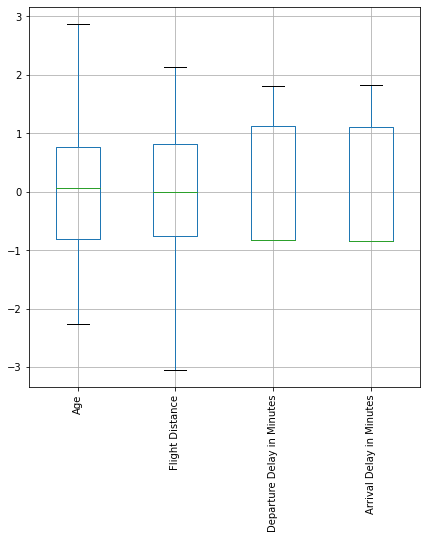

In [358]:
xtrain[df_num.columns].boxplot()
plt.xticks(rotation=90)
plt.show()

In [359]:
LR=LogisticRegression()
model2=LR.fit(xtrain,ytrain)
ypred=model2.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     21972
           1       0.87      0.84      0.85     16875

    accuracy                           0.88     38847
   macro avg       0.87      0.87      0.87     38847
weighted avg       0.88      0.88      0.87     38847



In [360]:
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model2, X,Y,
                         cv=cv, n_jobs=-1)

print(abs(scores))
print("mean score",round(np.mean(abs(scores)),2))

[0.80925168 0.82925322 0.81064175 0.81172291 0.7627616  0.80817052
 0.8125724  0.82252085 0.81495212 0.80468026]
mean score 0.81


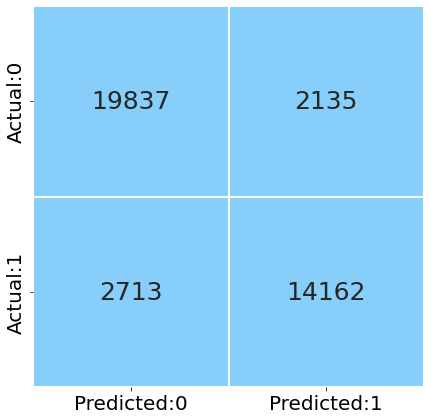

In [361]:
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

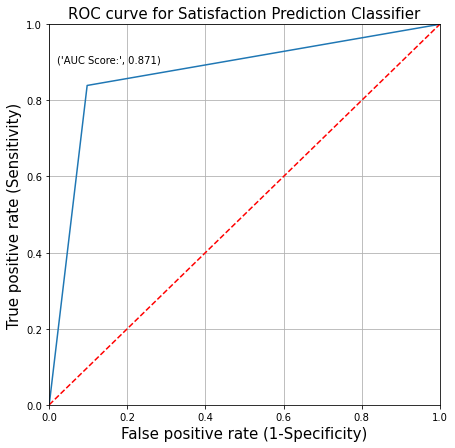

In [362]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Satisfaction Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, ypred),4)))
plt.grid(True)

In [363]:
scorecard["LR_scaled"]=["LR_Scaled",cm[0,0],cm[1,0],cm[1,1],cm[0,1],round(accuracy_score(ytest,ypred),2),round(np.mean(abs(scores)),2),round(f1_score(ytest,ypred),2),round(metrics.roc_auc_score(ytest, ypred),2)]

In [364]:
scorecard

,Base_Model,LR_scaled
Model_Name,BaseModel,LR_Scaled
TN,17702,19837
FN,3101,2713
TP,13774,14162
FP,4270,2135
Accuracy,0.81,0.88
Kfold_accuracy,0.81,0.81
F1-score,0.79,0.85
ROC-AUCscore,0.81,0.87


#### Decision Tree

In [365]:
from sklearn.tree import DecisionTreeClassifier

In [366]:
dt=DecisionTreeClassifier(criterion="entropy",random_state = 10)
model3=dt.fit(xtrain,ytrain)
ypred=model3.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21972
           1       0.94      0.94      0.94     16875

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



In [367]:
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model3, X,Y,
                         cv=cv, n_jobs=-1)

print(abs(scores))
print("mean score",np.mean(abs(scores)))

[0.94740907 0.94625068 0.94864468 0.94740907 0.94794965 0.94756352
 0.94802687 0.94586036 0.94794563 0.94879518]
mean score 0.9475854707017834


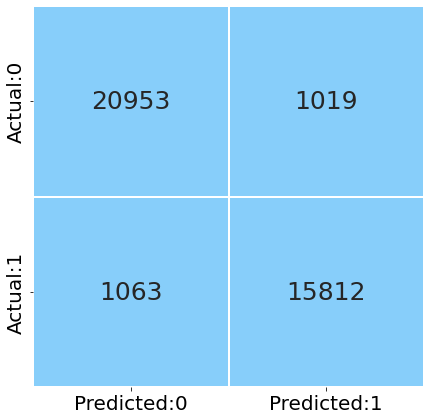

In [368]:
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

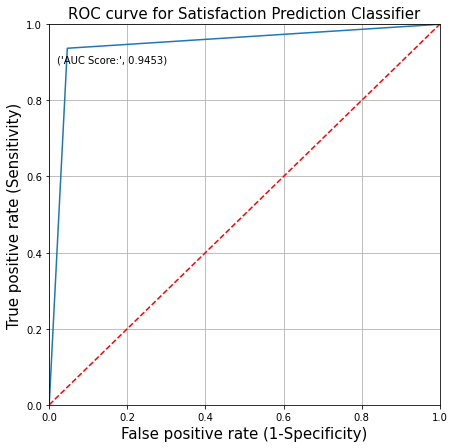

In [369]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Satisfaction Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, ypred),4)))
plt.grid(True)

In [371]:
scorecard["DecisionTree"]=["DecisionTree",cm[0,0],cm[1,0],cm[1,1],cm[0,1],round(accuracy_score(ytest,ypred),2),round(np.mean(abs(scores)),2),round(f1_score(ytest,ypred),2),round(metrics.roc_auc_score(ytest, ypred),2)]

In [372]:
scorecard

,Base_Model,LR_scaled,DecisionTree
Model_Name,BaseModel,LR_Scaled,DecisionTree
TN,17702,19837,20953
FN,3101,2713,1063
TP,13774,14162,15812
FP,4270,2135,1019
Accuracy,0.81,0.88,0.95
Kfold_accuracy,0.81,0.81,0.95
F1-score,0.79,0.85,0.94
ROC-AUCscore,0.81,0.87,0.95


##### Tuned Decision Tree

In [240]:
#Tuned decision tree
tuned_p=[{"criterion":["gini","entropy"],"max_depth":range(2,12),"min_samples_split":[5,10,15,20,25]}]
tree_grid=GridSearchCV(estimator=dt,param_grid=tuned_p,cv=5,n_jobs=-1,scoring="accuracy")
tree_grid.fit(xtrain,ytrain)
print("best params:",tree_grid.best_params_)

best params: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 5}


In [373]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=11,min_samples_split=5,random_state = 10)
model4=dt.fit(xtrain,ytrain)
ypred=model4.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     21972
           1       0.95      0.93      0.94     16875

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



In [374]:
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(dt, X,Y,
                         cv=cv, n_jobs=-1)

print(abs(scores))
print("mean score",np.mean(abs(scores)))

[0.95034366 0.95034366 0.94733184 0.94717739 0.94926249 0.94926249
 0.94671403 0.9476367  0.94964473 0.94894964]
mean score 0.9486666633027891


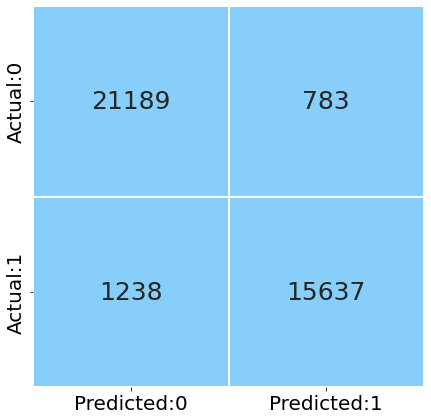

In [375]:
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

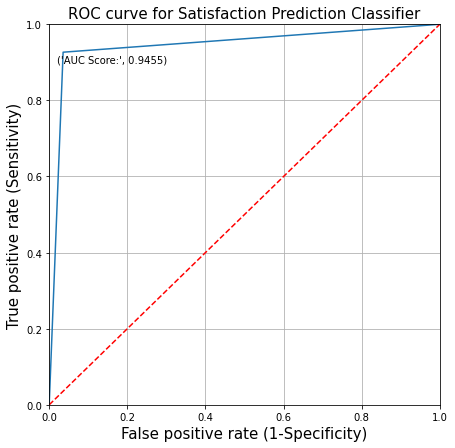

In [376]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Satisfaction Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, ypred),4)))
plt.grid(True)

In [377]:
scorecard["DecisionTreeTuned"]=["DecisionTree_tuned",cm[0,0],cm[1,0],cm[1,1],cm[0,1],round(accuracy_score(ytest,ypred),2),round(np.mean(abs(scores)),2),round(f1_score(ytest,ypred),2),round(metrics.roc_auc_score(ytest, ypred),2)]

In [378]:
scorecard

,Base_Model,LR_scaled,DecisionTree,DecisionTreeTuned
Model_Name,BaseModel,LR_Scaled,DecisionTree,DecisionTree_tuned
TN,17702,19837,20953,21189
FN,3101,2713,1063,1238
TP,13774,14162,15812,15637
FP,4270,2135,1019,783
Accuracy,0.81,0.88,0.95,0.95
Kfold_accuracy,0.81,0.81,0.95,0.95
F1-score,0.79,0.85,0.94,0.94
ROC-AUCscore,0.81,0.87,0.95,0.95


#### RandomForestClassifier

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [379]:
rf=RandomForestClassifier(n_estimators=5,criterion="entropy",random_state = 10)
model5=rf.fit(xtrain,ytrain)
ypred=model5.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21972
           1       0.96      0.93      0.94     16875

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



In [380]:
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(rf, X,Y,
                         cv=cv, n_jobs=-1)

print(abs(scores))
print("mean score",np.mean(abs(scores)))

[0.95428218 0.95327825 0.95358715 0.95366438 0.95281489 0.95157927
 0.95366438 0.95250232 0.95219339 0.95435589]
mean score 0.953192208290918


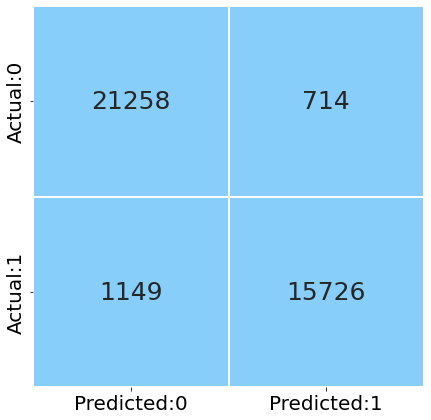

In [381]:
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

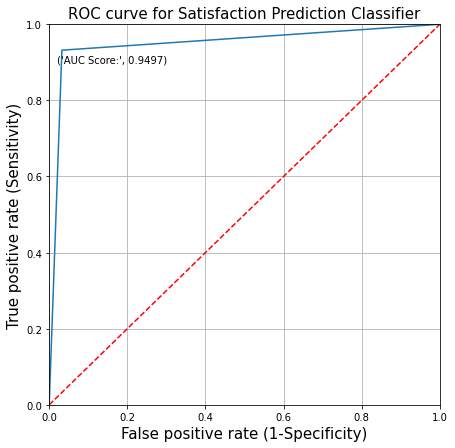

In [382]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Satisfaction Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, ypred),4)))
plt.grid(True)

In [383]:
scorecard["RandomForest"]=["RandomForest",cm[0,0],cm[1,0],cm[1,1],cm[0,1],round(accuracy_score(ytest,ypred),2),round(np.mean(abs(scores)),2),round(f1_score(ytest,ypred),2),round(metrics.roc_auc_score(ytest, ypred),2)]

In [384]:
scorecard

,Base_Model,LR_scaled,DecisionTree,DecisionTreeTuned,RandomForest
Model_Name,BaseModel,LR_Scaled,DecisionTree,DecisionTree_tuned,RandomForest
TN,17702,19837,20953,21189,21258
FN,3101,2713,1063,1238,1149
TP,13774,14162,15812,15637,15726
FP,4270,2135,1019,783,714
Accuracy,0.81,0.88,0.95,0.95,0.95
Kfold_accuracy,0.81,0.81,0.95,0.95,0.95
F1-score,0.79,0.85,0.94,0.94,0.94
ROC-AUCscore,0.81,0.87,0.95,0.95,0.95


#### RandomForestTuned

In [385]:
rf=RandomForestClassifier(criterion="entropy",max_depth=20,min_samples_split=25,random_state = 10,n_estimators=100)
model6=rf.fit(xtrain,ytrain)
ypred=model6.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     21972
           1       0.97      0.94      0.95     16875

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



In [386]:
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(rf, X,Y,
                         cv=cv, n_jobs=-1)

print(abs(scores))
print("mean score",np.mean(abs(scores)))

[0.96154143 0.96200479 0.96161866 0.96038304 0.9590702  0.96300873
 0.96177311 0.961384   0.96323757 0.96269694]
mean score 0.9616718458452761


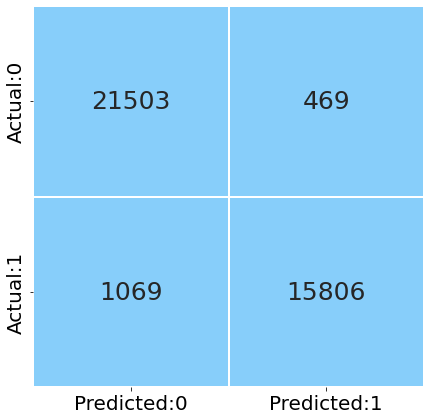

In [387]:
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

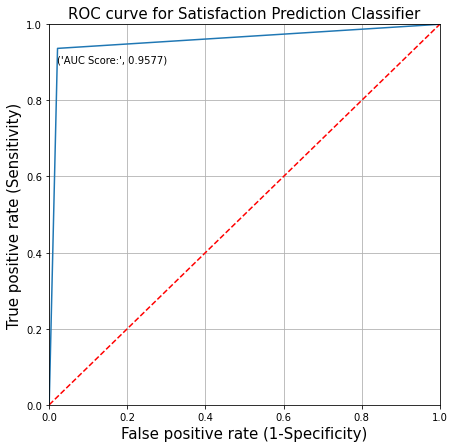

In [388]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Satisfaction Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, ypred),4)))
plt.grid(True)

In [389]:
scorecard["RandomForestTuned"]=["RandomForest_tuned",cm[0,0],cm[1,0],cm[1,1],cm[0,1],round(accuracy_score(ytest,ypred),2),round(np.mean(abs(scores)),2),round(f1_score(ytest,ypred),2),round(metrics.roc_auc_score(ytest, ypred),2)]

In [390]:
scorecard

,Base_Model,LR_scaled,DecisionTree,DecisionTreeTuned,RandomForest,RandomForestTuned
Model_Name,BaseModel,LR_Scaled,DecisionTree,DecisionTree_tuned,RandomForest,RandomForest_tuned
TN,17702,19837,20953,21189,21258,21503
FN,3101,2713,1063,1238,1149,1069
TP,13774,14162,15812,15637,15726,15806
FP,4270,2135,1019,783,714,469
Accuracy,0.81,0.88,0.95,0.95,0.95,0.96
Kfold_accuracy,0.81,0.81,0.95,0.95,0.95,0.96
F1-score,0.79,0.85,0.94,0.94,0.94,0.95
ROC-AUCscore,0.81,0.87,0.95,0.95,0.95,0.96


##### Boosting-XGBoost

In [157]:
from xgboost import XGBClassifier

In [391]:
xg=XGBClassifier()
model7=xg.fit(xtrain,ytrain)
ypred=model7.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

[12:24:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21972
           1       0.97      0.94      0.96     16875

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



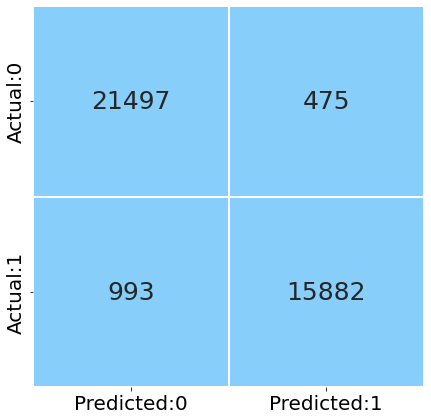

In [392]:
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

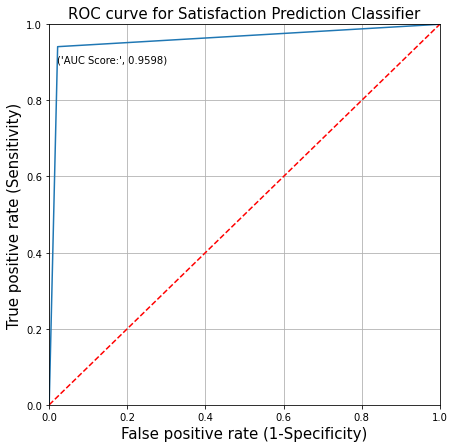

In [393]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Satisfaction Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, ypred),4)))
plt.grid(True)

In [394]:
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(xg, X,Y,
                         cv=cv, n_jobs=-1)

print(abs(scores))
print("mean score",np.mean(abs(scores)))

[0.96331763 0.9626226  0.96269982 0.96478493 0.96200479 0.96447602
 0.9632404  0.96169293 0.96431881 0.96439605]
mean score 0.9633553973880993


In [395]:
scorecard["XGBoost"]=["XGBoost",cm[0,0],cm[1,0],cm[1,1],cm[0,1],round(accuracy_score(ytest,ypred),2),round(np.mean(abs(scores)),2),round(f1_score(ytest,ypred),2),round(metrics.roc_auc_score(ytest, ypred),2)]

In [396]:
scorecard

,Base_Model,LR_scaled,DecisionTree,DecisionTreeTuned,RandomForest,RandomForestTuned,XGBoost
Model_Name,BaseModel,LR_Scaled,DecisionTree,DecisionTree_tuned,RandomForest,RandomForest_tuned,XGBoost
TN,17702,19837,20953,21189,21258,21503,21497
FN,3101,2713,1063,1238,1149,1069,993
TP,13774,14162,15812,15637,15726,15806,15882
FP,4270,2135,1019,783,714,469,475
Accuracy,0.81,0.88,0.95,0.95,0.95,0.96,0.96
Kfold_accuracy,0.81,0.81,0.95,0.95,0.95,0.96,0.96
F1-score,0.79,0.85,0.94,0.94,0.94,0.95,0.96
ROC-AUCscore,0.81,0.87,0.95,0.95,0.95,0.96,0.96


In [398]:
sc=scorecard.T

In [399]:
sc

,Model_Name,TN,FN,TP,FP,Accuracy,Kfold_accuracy,F1-score,ROC-AUCscore
Base_Model,BaseModel,17702,3101,13774,4270,0.81,0.81,0.79,0.81
LR_scaled,LR_Scaled,19837,2713,14162,2135,0.88,0.81,0.85,0.87
DecisionTree,DecisionTree,20953,1063,15812,1019,0.95,0.95,0.94,0.95
DecisionTreeTuned,DecisionTree_tuned,21189,1238,15637,783,0.95,0.95,0.94,0.95
RandomForest,RandomForest,21258,1149,15726,714,0.95,0.95,0.94,0.95
RandomForestTuned,RandomForest_tuned,21503,1069,15806,469,0.96,0.96,0.95,0.96
XGBoost,XGBoost,21497,993,15882,475,0.96,0.96,0.96,0.96


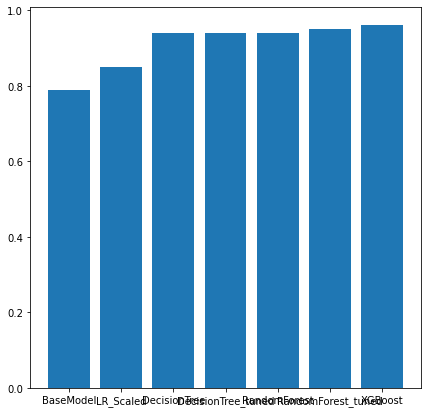

In [403]:
plt.bar(sc["Model_Name"],sc["F1-score"])
plt.show()

##### We see that XGBoost gave us the best results overall for prediction of satisfaction

##### We proceed with feature selection on the best model to see if we can maintain the accuracy while also reducing the complexity

In [266]:
data=pd.DataFrame(model7.feature_importances_,index=xtrain.columns)
###taking the top 10 features
data.sort_values(by=0,ascending=False).head(10).index

Index(['Online boarding', 'Type of Travel_Personal Travel',
       'Inflight wifi service', 'Customer Type_disloyal Customer',
       'Inflight entertainment', 'Checkin service', 'Class_Eco', 'Cleanliness',
       'Baggage handling', 'Seat comfort'],
      dtype='object')

In [267]:
X=df[['Online boarding', 'Type of Travel_Personal Travel',
       'Inflight wifi service', 'Customer Type_disloyal Customer',
       'Inflight entertainment', 'Checkin service', 'Class_Eco', 'Cleanliness',
       'Baggage handling', 'Seat comfort']]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.7,random_state=100)

In [268]:
xg=XGBClassifier()
model=xg.fit(xtrain,ytrain)
ypred=model.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

[16:09:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21972
           1       0.96      0.93      0.95     16875

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



#### After reducing the features from 24 to 10 we still see an accuracy of 95%,this can be particularly useful in day to day business requirements as reducing the complexity can make model prediction easier and more efficient.There is a minimal drop in accuracy of the model after removing more than 50% of the features, making it more practical for real time application.
###### The most important features contributing to the model and therefore to predicting customer satisfaction were found to be:

'Online boarding'

'Type of Travel'

'Inflight wifi service'

'Customer Type'

'Inflight entertainment'

'Checkin service'

'Class'

'Cleanliness'

'Baggage handling'

'Seat comfort'

In [290]:
sc=scorecard.T
sc

,Model_Name,Accuracy,Kfold_accuracy,F1-score
Base_Model,BaseModel,0.81,0.81,0.79
LR_scaled,LR_Scaled,0.88,0.81,0.85
DecisionTree,DecisionTree,0.95,0.95,0.94
DecisionTreeTuned,DecisionTree_tuned,0.95,0.95,0.94
RandomForest,RandomForest,0.95,0.95,0.94
RandomForestTuned,RandomForest_tuned,0.96,0.96,0.95
XGBoost,XGBoost,0.96,0.96,0.96


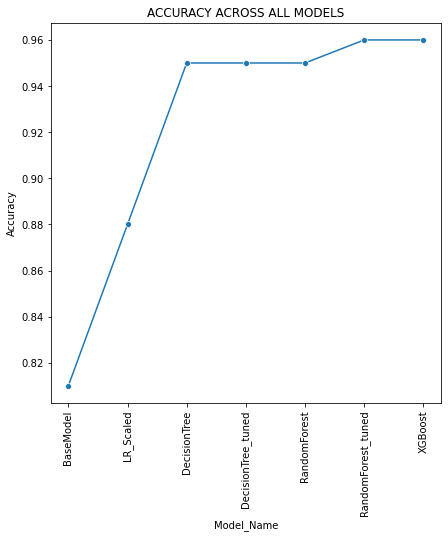

In [306]:
sns.lineplot(sc["Model_Name"],sc["Accuracy"],marker="o")
plt.xticks(rotation=90)
plt.title("ACCURACY ACROSS ALL MODELS")
plt.show()

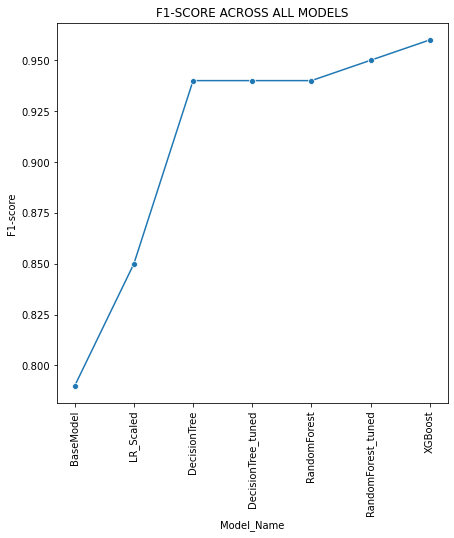

In [307]:
sns.lineplot(sc["Model_Name"],sc["F1-score"],marker="o")
plt.xticks(rotation=90)
plt.title("F1-SCORE ACROSS ALL MODELS")
plt.show()

In [301]:
df1=df.copy()

In [302]:
df1.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [303]:
df1=df1[df1["Class"]=="Eco"]

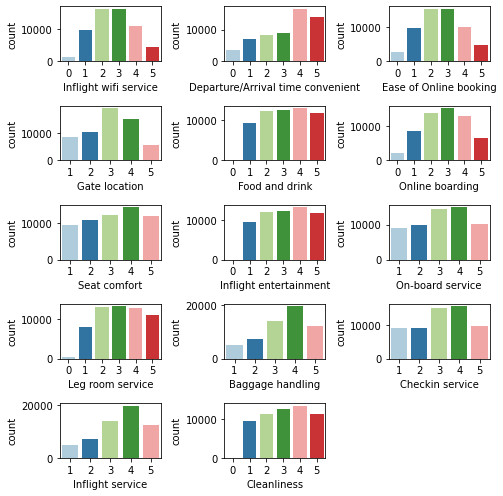

In [304]:
df_rating=df1[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
             'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service',
             'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']]

plt.rcParams['figure.figsize']=[7,7]
for i,j in zip(df_rating,range(1,len(df_rating)+1)):
    plt.subplot(5,3,j)
    sns.countplot(df1[i],palette='Paired')
plt.tight_layout()
plt.show()